Code Python - Electre Tri 

3 CODES FOR THE PROCESS
1. Import data from Excel 
2. Compute Electre Tri functions 
3. Apply Electre Tir to the input data: select the variance and the number of repetions > returns the graphical representation of the scenarios in the categories and a csv file 06_Results with the tables

In [1]:

"""
Created on Wed Mar 16 2022 at 15:37
Modified on Thur Dec 01 2022 at 10:00

@author: sdaniel
@author: rviala
@author: ngauthier
"""


import csv
import xlrd

Read = True
Write = True

if Read:
    myBook = xlrd.open_workbook('00_Performances_test.xls')
    Actions_performances = myBook.sheet_by_name('Evaluations')
    Boundaries_actions_performances = myBook.sheet_by_name('Seuils et profils')
    Weights = myBook.sheet_by_name('Poids')
    Actions = myBook.sheet_by_name('Scenarios')

    C = []
    for row in range(1, 17):
        C.append(Weights.cell_value(row, 0))

    W = []
    for row in range(1, 17):
        W.append(Weights.cell_value(row, 2))


    A = []
    for row in range(3, 31):
        A.append(Actions_performances.cell_value(row, 0))

    MY = {}
    for row in range(3, 31):
        perf = []
        for col in range(1, 18):
            if Actions_performances.cell_value(row, col) == 'OUI':
                perf.append(1)
            elif Actions_performances.cell_value(row, col) == 'NON':
                perf.append(0)
            elif col in [1, 2, 4, 5, 10, 16]:
                perf.append(Actions_performances.cell_value(row, col) * (-1))
            else:
                perf.append(Actions_performances.cell_value(row, col))
        MY[Actions_performances.cell_value(row, 0)] = perf

    D = []
    Cri = []
    for col in range(20, 36):
        Cri.append(Actions_performances.cell_value(1, col))
        if Actions_performances.cell_value(31, col) == 'Poisson':
            D.append('P')
        elif Actions_performances.cell_value(31, col) == 'Exponentielle':
            D.append('E')
        elif Actions_performances.cell_value(31, col) == 'Normale':
            D.append('N')
        else:
            D.append('LN')

    B = []
    for col in range(4, 10):
        B.append(Boundaries_actions_performances.cell_value(1, col))

    BP = {}
    for col in range(4, 10):
        perf = []
        for row in range(3, 19):
            perf.append(Boundaries_actions_performances.cell_value(row, col))
        BP[Boundaries_actions_performances.cell_value(1, col)] = perf

    CAT = ['C1', 'C2', 'C3', 'C4', 'C5']

    T = {}
    for row in range(3, 19):
        T[Boundaries_actions_performances.cell_value(row, 0)] = [Boundaries_actions_performances.cell_value(row, 10),
                                                                 Boundaries_actions_performances.cell_value(row, 11),
                                                                 Boundaries_actions_performances.cell_value(row, 12)]


    if Write:

        with open('01_Weights.csv', 'w', encoding='UTF8', newline='') as W_csv:
            writer = csv.writer(W_csv)
            # write the first header corresponding to the criteria
            writer.writerow(C)
            # write the second header corresponding to the weights
            writer.writerow(W)

        with open('02_Actions_performancesMY.csv', 'w', encoding='UTF8', newline='') as MY_csv:
            writer = csv.writer(MY_csv)
            # write the first header corresponding to the scenarios
            writer.writerow(A)
            #write the criteria
            writer.writerow(Cri)
            # write the data corresponding to the performances
            for a in A:
                writer.writerow(MY[a])

        with open('03_Distribution_Types.csv', 'w', encoding='UTF8', newline='') as D_csv:
            writer = csv.writer(D_csv)
            # write the criteria
            writer.writerow(Cri)
            # write the first header corresponding to the distribution
            writer.writerow(D)
            # # write the variance for each distribution
            # for d in D:
            #     writer.writerow(DV[d])

        with open('04_Boundaries_actions_performances.csv', 'w', encoding='UTF8', newline='') as BP_csv:
            writer = csv.writer(BP_csv)
            # write the first header corresponding to the boundaries actions
            writer.writerow(B)
            # write the data corresponding to the performances
            for b in B:
                writer.writerow(BP[b])

        with open('05_Thresholds.csv', 'w', encoding='UTF8', newline='') as T_csv:
            writer = csv.writer(T_csv)
            # write the header corresponding to the name of the thresholds
            writer.writerow(['q', 'p', 'v'])
            # write the data corresponding to the thresholds
            for c in C:
                writer.writerow(T[c])




0
1
2
3
4
5
6
7
8
9


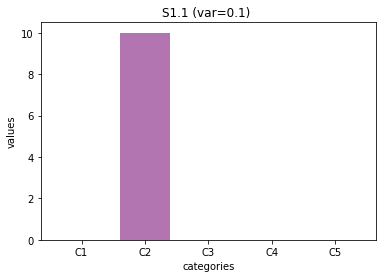

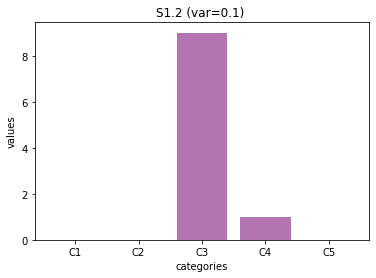

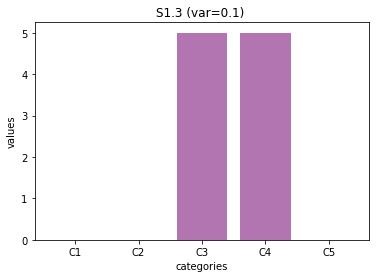

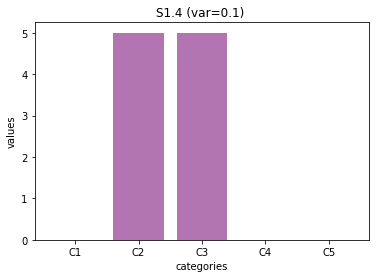

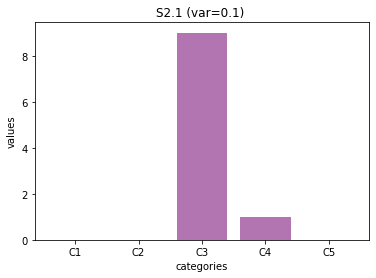

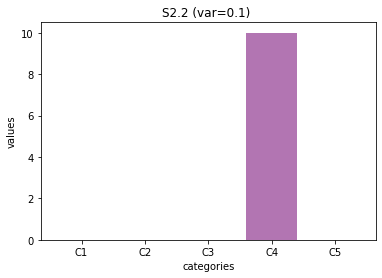

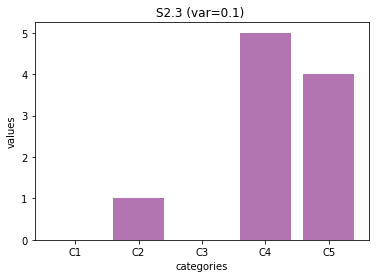

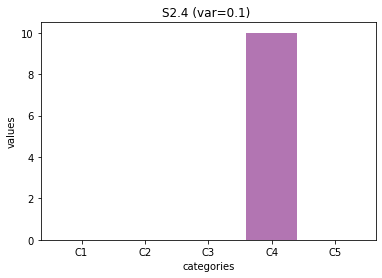

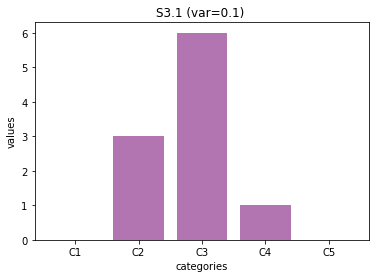

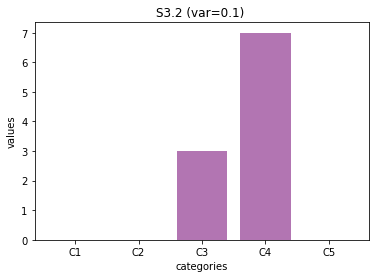

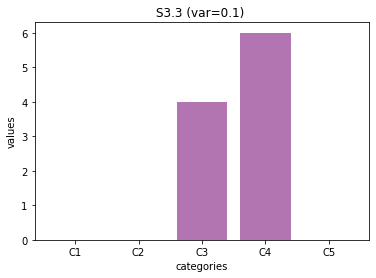

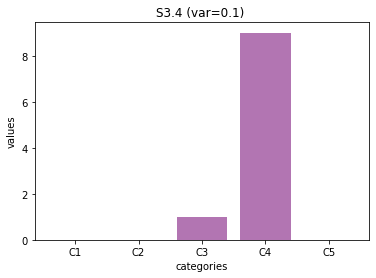

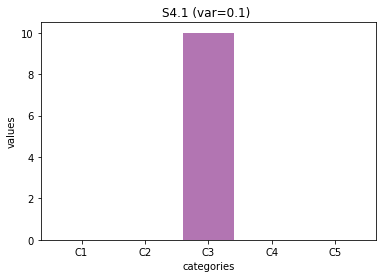

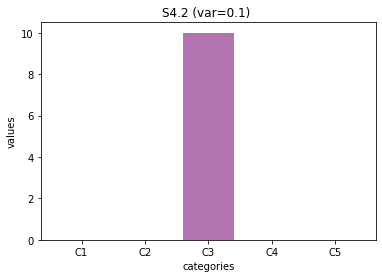

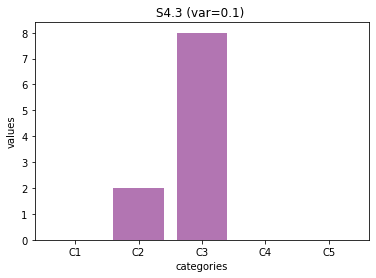

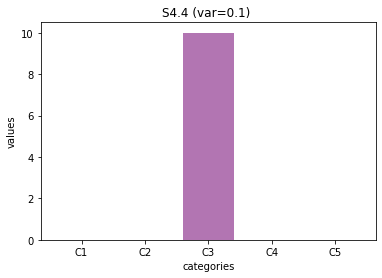

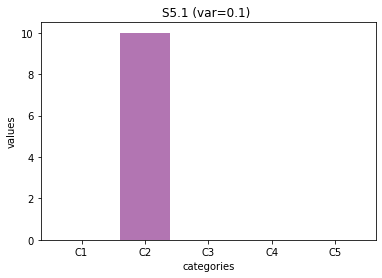

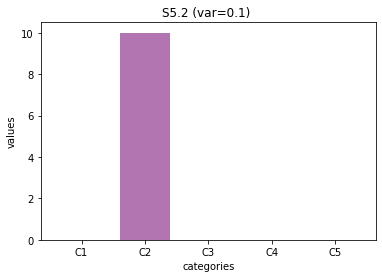

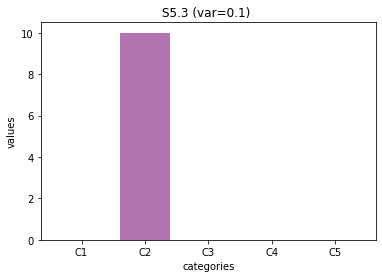

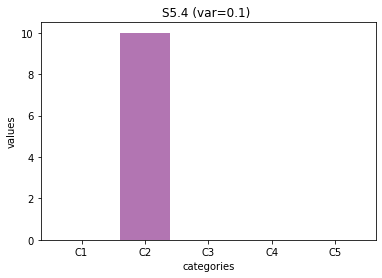

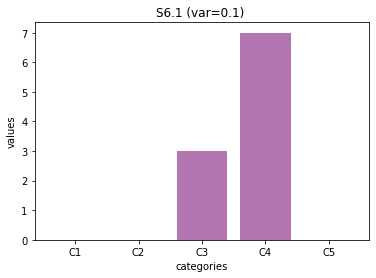

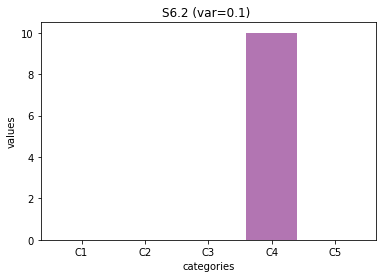

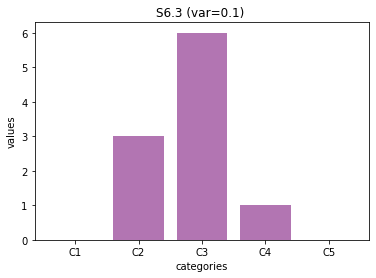

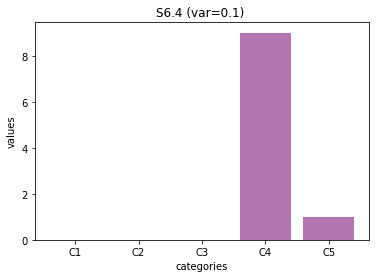

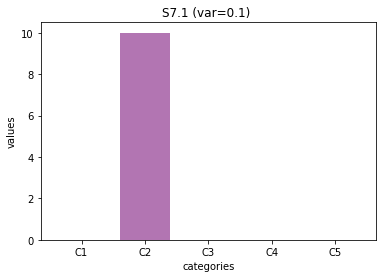

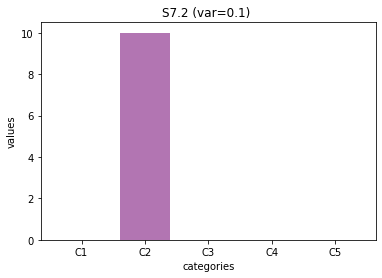

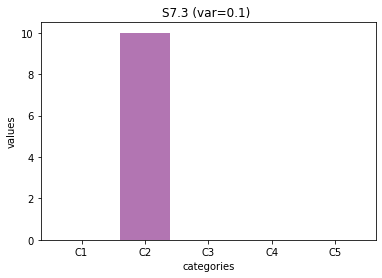

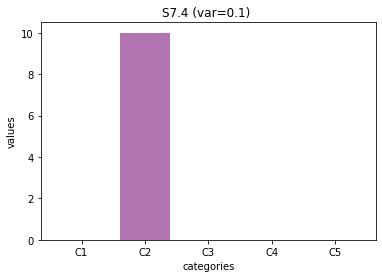

variance: 0.1
λ: 0.75
{'S1.1': [0, 10, 0, 0, 0], 'S1.2': [0, 0, 9, 1, 0], 'S1.3': [0, 0, 5, 5, 0], 'S1.4': [0, 5, 5, 0, 0], 'S2.1': [0, 0, 9, 1, 0], 'S2.2': [0, 0, 0, 10, 0], 'S2.3': [0, 1, 0, 5, 4], 'S2.4': [0, 0, 0, 10, 0], 'S3.1': [0, 3, 6, 1, 0], 'S3.2': [0, 0, 3, 7, 0], 'S3.3': [0, 0, 4, 6, 0], 'S3.4': [0, 0, 1, 9, 0], 'S4.1': [0, 0, 10, 0, 0], 'S4.2': [0, 0, 10, 0, 0], 'S4.3': [0, 2, 8, 0, 0], 'S4.4': [0, 0, 10, 0, 0], 'S5.1': [0, 10, 0, 0, 0], 'S5.2': [0, 10, 0, 0, 0], 'S5.3': [0, 10, 0, 0, 0], 'S5.4': [0, 10, 0, 0, 0], 'S6.1': [0, 0, 3, 7, 0], 'S6.2': [0, 0, 0, 10, 0], 'S6.3': [0, 3, 6, 1, 0], 'S6.4': [0, 0, 0, 9, 1], 'S7.1': [0, 10, 0, 0, 0], 'S7.2': [0, 10, 0, 0, 0], 'S7.3': [0, 10, 0, 0, 0], 'S7.4': [0, 10, 0, 0, 0]}
{'S1.1': [10, 0, 0, 0, 0], 'S1.2': [0, 9, 1, 0, 0], 'S1.3': [0, 5, 5, 0, 0], 'S1.4': [5, 5, 0, 0, 0], 'S2.1': [0, 9, 1, 0, 0], 'S2.2': [0, 0, 2, 8, 0], 'S2.3': [1, 0, 4, 5, 0], 'S2.4': [0, 0, 6, 4, 0], 'S3.1': [3, 6, 1, 0, 0], 'S3.2': [0, 0, 10, 0, 0], 'S3.3': [

In [4]:
"""
Created on Wed Mar 16 2022 at 15:37
Modified on Thur Dec 01 2022 at 10:00

@author: sdaniel
@author: rviala
@author: ngauthier
"""
import math

import matplotlib.pyplot as plt


########################################################################################################################
# ===========================================   Input data import   ================================================== #
########################################################################################################################

CAT = ['C1', 'C2', 'C3', 'C4', 'C5']
S = ['S1.1', 'S1.2', 'S1.3', 'S1.4', 'S2.1', 'S2.2', 'S2.3', 'S2.4', 'S3.1', 'S3.2', 'S3.3', 'S3.4', 'S4.1', 'S4.2',
     'S4.3',
     'S4.4', 'S5.1', 'S5.2', 'S5.3', 'S5.4', 'S6.1', 'S6.2', 'S6.3', 'S6.4', 'S7.1', 'S7.2', 'S7.3', 'S7.4']
variance = 0.1 #to be selected
repetition = 10 #to be selected
λ = 0.75 #to be selected

########################################################################################################################
# ================================   Automatic execution of the ELECTRE Tri-B   ====================================== #
########################################################################################################################


memoire_opti = {}
memoire_pessi = {}
for s in S:
    memoire_opti[s] = [0, 0, 0, 0, 0]
    memoire_pessi[s] = [0, 0, 0, 0, 0]

for s in range(repetition):
    C, W, A, AP, B, BP, T = input_data('01_Weights.csv',
                                                     '02_Actions_performancesMY.csv',
                                                     '03_Distribution_Types.csv',
                                                     '04_Boundaries_actions_performances.csv',
                                                     '05_Thresholds.csv', variance)
    Sigma_bk_init, Separability_init = separability_test(C, W, B, BP, T, display='NO')
    λ_min = math.ceil(max(Sigma_bk_init.values()) * 1000) / 1000
    Test_init = ELECTRE_Tri_B(C, W, A, AP, B, BP, T, CAT, λ, display='NO')
    Conc, Disc, Glob_conc, Cred, Over_rank, Pessi_sort, Opti_sort, Med_rank, Sigma_bk, Separability = \
        ELECTRE_Tri_B(C, W, A, AP, B, BP, T, CAT, λ, display='NO')
    memoire_opti = compter(Opti_sort[1], memoire_opti)
    memoire_pessi = compter(Pessi_sort[1], memoire_pessi)
    print(s)

Write_csv_Results(memoire_opti, memoire_pessi)

for r in S:
    x = CAT
    y = memoire_opti[r]
    plt.title(r + ' (var=' + str(variance) + ') ')
    plt.xlabel('categories')
    plt.ylabel('values')
    plt.bar(x, y, color=(0.5, 0.1, 0.5, 0.6))
    plt.show()

print('variance: ' + str(variance))
print('λ: '+ str(λ))
print(memoire_opti)
print(memoire_pessi)

#--------------------ELECTRE-TRI-B----------------------------#

#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Wed Mar 16 2022 at 15:37
Modified on Thur Dec 01 2022 at 10:00

@author: sdaniel
@author: rviala
@author: ngauthier
"""

from numpy import random, vstack, empty
import math
import csv


def input_data(name_W, name_MY, name_D, name_BP, name_T, variance):
    """
    Generates the different input data in the correct format from .csv files.

    :param name_W: Name of the .csv file which must contain on the first line the name of the criteria and on the
        second line the weightings.
    :param name_MY: Name of the .csv file which must contain on the first line the names of the possibles actions and
        on the following lines the performance of each action against each criterion.
    :param name_D: Name of the .csv file which must contain on the first line the names of the boundaries actions and
        on the following lines, the distributionper criteria
    :param name_T: Name of the .csv file which must contain on the first line the names of the thresholds and on the
        following lines, for each criterion, the values of the indifference threshold, preference threshold and veto
        threshold.
    :param variance: Variance defined in the main

    :return C: List containing the names of the criteria as strings.
    :return W: Dictionary containing the weightings of each criterion.
    :return A: List containing the names of the actions as strings.
    :return AP: Actions performances dictionary.
    :return B: List containing the names of the boundary reference actions as strings.
    :return BP: Boundary reference actions performances dictionary.
    :return T: Dictionary of thresholds.
    """
    C = []
    W = {}
    A = []
    MY = {}
    B = []
    BP = {}
    T = {}
    D = {}

    with open(name_W, 'r', newline='') as W_csv:
        reader = csv.reader(W_csv, delimiter=',')
        line_count = 0
        for row in reader:
            if line_count == 0:
                [C.append(item) for item in row]
            else:
                for j in range(len(row)):
                    W[C[j]] = float(row[j])
            line_count += 1

    with open(name_MY, 'r', newline='') as MY_csv:
        reader = csv.reader(MY_csv, delimiter=',')
        line_count = 0
        Cri = []
        for row in reader:
            if line_count == 0:
                [A.append(item) for item in row]
            if line_count == 1:
                [Cri.append(item) for item in row]
            else:
                perf_A = {}
                for j in range(len(Cri)):
                    perf_A[Cri[j]] = row[j]
                    MY[A[line_count - 2]] = perf_A
            line_count += 1

    with open(name_D, 'r', newline='') as D_csv:
        reader = csv.reader(D_csv, delimiter=',')
        line_count = 0
        Cri = []
        for row in reader:
            if line_count == 0:
                [Cri.append(item) for item in row]
            else:
                for j in range(len(row)):
                    perf_D = row[j]
                    D[Cri[j]] = perf_D
            line_count += 1

    with open(name_BP, 'r', newline='') as BP_csv:
        reader = csv.reader(BP_csv, delimiter=',')
        line_count = 0
        for row in reader:
            if line_count == 0:
                [B.append(item) for item in row]
            else:
                perf_B = {}
                for j in range(len(row)):
                    perf_B[C[j]] = float(row[j])
                BP[B[line_count - 1]] = perf_B
            line_count += 1

    with open(name_T, 'r', newline='') as T_csv:
        reader = csv.reader(T_csv, delimiter=',')
        line_count = 0
        for row in reader:
            if line_count == 0:
                line_count += 1
                continue
            else:
                perf_T = []
                [perf_T.append(float(item)) for item in row]
                T[C[line_count - 1]] = tuple(perf_T)
            line_count += 1

    AP = MonteCarlo(MY, variance, D)


    return C, W, A, AP, B, BP, T


def MonteCarlo(MY, variance, D):
    """
    Build the distribution of each performance and pick a value in it

    :param MY: Dictionary of mean values for each criterion and each scenario
    :param D: Dictionary of each distribution for each criterion
    :return: Dictionary AP with performance for each criterion and each scenario
    """
    AP = {}
    for s in MY:
        perf_scenar = {}
        for d in D:
            M = float(MY[s][d])
            if D[d] == 'N':
                v = abs(M*variance)
                perf = random.normal(M, v, 1)
                perf_scenar[d] = perf[0]
        AP[s] = perf_scenar
    return AP


def concordance(C, A, AP, b, BP, T):
    """
    Calculates the concordance matrix for a given boundary reference action.

    :param C: List containing the names of the criteria as strings.
    :param A: List containing the names of the actions as strings.
    :param AP: Actions performances dictionary.
    :param b: Name of the boundary reference actions for which the concordance matrix is calculated.
    :param BP: Performances dictionary of the boundary reference actions.
    :param T: Dictionary of thresholds.

    :return Concordance: Dictionary containing the matrix of concordance of actions with regard to the boundary
        reference action chosen as input. The keys are '(ai,bk)' and '(bk,ai)'.
    """
    Concordance = {}
    conc_2D_1 = empty((0, len(C)))
    conc_2D_2 = empty((0, len(C)))
    for a in A:
        conc_1D_1 = [min(1, max(0, (AP[a][c] - BP[b][c] + T[c][1]) / (T[c][1] - T[c][0]))) for c in C]
        conc_1D_2 = [min(1, max(0, (BP[b][c] - AP[a][c] + T[c][1]) / (T[c][1] - T[c][0]))) for c in C]
        conc_2D_1 = vstack((conc_2D_1, conc_1D_1))
        conc_2D_2 = vstack((conc_2D_2, conc_1D_2))
    Concordance['c(ai,{})'.format(b)] = conc_2D_1
    Concordance['c({},ai)'.format(b)] = conc_2D_2
    return Concordance


def discordance(C, A, AP, b, BP, T):
    """
    Calculates the discordance matrix for a given boundary reference action.

    :param C: List containing the names of the criteria as strings.
    :param A: List containing the names of the actions as strings.
    :param AP: Actions performances dictionary.
    :param b: Name of the boundary reference actions for which the discordance matrix is calculated.
    :param BP: Performances dictionary of the boundary reference actions.
    :param T: Dictionary of thresholds.

    :return discordance: Dictionary containing the matrix of discordance of actions with regard to the boundary
        reference action chosen as input. The keys are '(ai,bk)' and '(bk,ai)'.
    """
    Discordance = {}
    disc_2D_1 = empty((0, len(C)))
    disc_2D_2 = empty((0, len(C)))
    for a in A:
        disc_1D_1 = [min(1, max(0, (BP[b][c] - AP[a][c] - T[c][1]) / (T[c][2] - T[c][1]))) for c in C]
        disc_1D_2 = [min(1, max(0, (AP[a][c] - BP[b][c] - T[c][1]) / (T[c][2] - T[c][1]))) for c in C]
        disc_2D_1 = vstack((disc_2D_1, disc_1D_1))
        disc_2D_2 = vstack((disc_2D_2, disc_1D_2))
    Discordance['d(ai,{})'.format(b)] = disc_2D_1
    Discordance['d({},ai)'.format(b)] = disc_2D_2
    return Discordance


def global_concordance(CONC, b, C, W, A):
    """
    Calculates the global concordances vectors for a given boundary reference action using a given concordance matrix.

    :param CONC: Matrix of concordance of actions with regard to a given boundary reference action.
    :param b: Name of the boundary reference actions for which you want to calculate the global concordance indices.
    :param C: List containing the names of the criteria as strings.
    :param W: Dictionary containing the weightings of each criterion.
    :param A: List containing the names of the actions as strings.

    :return Global_concordance: Dictionary containing two vectors corresponding to the global concordance of the
        actions Si with the boundary actions defined in input bk, and of bk with the actions Si.
        The keys are '(ai,bk)' and '(bk,ai)'.
    """
    Global_concordance = {}
    glob_conc_1D_1 = []
    glob_conc_1D_2 = []
    for i in range(len(A)):
        gc1 = [(W[C[j]] * CONC['c(ai,{})'.format(b)][i][j]) / sum(W.values()) for j in range(len(C))]
        gc2 = [(W[C[j]] * CONC['c({},ai)'.format(b)][i][j]) / sum(W.values()) for j in range(len(C))]
        glob_conc_1D_1.append(sum(gc1))
        glob_conc_1D_2.append(sum(gc2))
    Global_concordance['C(ai,{})'.format(b)] = glob_conc_1D_1
    Global_concordance['C({},ai)'.format(b)] = glob_conc_1D_2
    return Global_concordance


def credibility(GLOB_CONC, b, DISC, C, A):
    """
    Calculates the credibility vectors for a given boundary reference action using the global concordance vector and
        the discordance matrix for the same boundary reference action.

    :param GLOB_CONC: Dictionary containing the global concordances vectors for a given boundary reference action.
    :param b: Name of the boundary reference actions for which you want to calculate the credibility indices.
    :param DISC: Matrix of discordance of actions with regard to the same given boundary reference action.
    :param C: List containing the names of the criteria as strings.
    :param A: List containing the names of the actions as strings.

    :return Credibility: Dictionary containing two vectors corresponding to the credibility of the over ranking of the
        actions Si by the boundary reference action defined as input bk, and to the over ranking of de bk by the
        actions Si. The keys are '(ai,bk)' and '(bk,ai)'.
    """
    Credibility = {}
    cred_1 = []
    cred_2 = []
    for i in range(len(A)):
        cr1 = 1
        cr2 = 1
        for j in range(len(C)):
            if DISC['d(ai,{})'.format(b)][i][j] > GLOB_CONC['C(ai,{})'.format(b)][i]:
                cr1 = cr1 * (1 - DISC['d(ai,{})'.format(b)][i][j]) / (1 - GLOB_CONC['C(ai,{})'.format(b)][i])
            else:
                cr1 = cr1 * 1
            if DISC['d({},ai)'.format(b)][i][j] > GLOB_CONC['C({},ai)'.format(b)][i]:
                cr2 = cr2 * (1 - DISC['d({},ai)'.format(b)][i][j]) / (1 - GLOB_CONC['C({},ai)'.format(b)][i])
            else:
                cr2 = cr2 * 1
        cred_1.append(cr1 * GLOB_CONC['C(ai,{})'.format(b)][i])
        cred_2.append(cr2 * GLOB_CONC['C({},ai)'.format(b)][i])
    Credibility['σ(ai,{})'.format(b)] = cred_1
    Credibility['σ({},ai)'.format(b)] = cred_2
    return Credibility


def over_ranking_relations(CRED, b, λ):
    """
    Built the over ranking relations matrix using the credibility vectors and the cutting threshold. The result is a
        matrix containing the following four outranking relations:
            - preference of ai over bk: '>'
            - preference of bk over ai: '<'
            - indifference: 'I'
            - incomparability: 'R'.

    :param CRED: List of credibility values for the boundary reference actions considered.
    :param b: Name of the boundary reference actions for which you want to calculate the over ranking relations.
    :param λ: Cutting threshold value.

    :return over_ranking: Dictionary containing the over ranking relation and where the keys are name of the boundaries
        reference actions, représenting the limits and boundaries of the different categories.
    """
    over_ranking = []

    for i in range(len(CRED['σ(ai,{})'.format(b)])):
        if CRED['σ(ai,{})'.format(b)][i] >= λ:
            if CRED['σ({},ai)'.format(b)][i] >= λ:
                over_ranking.append('I')
            else:
                over_ranking.append('>')
        else:
            if CRED['σ({},ai)'.format(b)][i] >= λ:
                over_ranking.append('<')
            else:
                over_ranking.append('R')

    return over_ranking


def pessimistic_sorting(OVER_RANK, CAT, A, B):
    """
    Rank the actions in the three different categories according to a pessimistic procedure.

    :param OVER_RANK: Dictionary containing the over sorting relations.
    :param CAT: List of the names of the different categories in which the actions will be classified.
    :param A: List containing the names of the actions as strings.
    :param B: Name of the boundary reference actions for which you want to calculate the concordance matrix.

    :return: sorting: Dictionary containing the different categories and the actions they contain. The keys are the name
        of the different categories. The values are lists containing the actions.
    :return: category: Dictionary containing the rank of each actions according to a pessimistic procedure.
        The keys are the name of the actions and the values are the median ranks.
    """
    sorting = {}
    category = {}
    for cat in CAT:
        sorting[cat] = []
    for i in range(len(A)):
        for j in reversed(range(len(CAT))):
            if OVER_RANK[B[j]][i] == '>' or OVER_RANK[B[j + 1]][i] == 'I':
                sorting[CAT[j]].append(A[i])
                category[A[i]] = j + 1
                break
    return sorting, category


def optimistic_sorting(OVER_RANK, CAT, A, B):
    """
    Rank the actions in the three different categories according to a optimistic procedure.

    :param OVER_RANK: Dictionary containing the over sorting relations for each boundary reference actions.
    :param CAT: List of the names of the different categories in which the actions will be classified.
    :param A: List containing the names of the actions as strings.
    :param B: Name of the boundary reference actions for which you want to calculate the concordance matrix.

    :return: sorting: Dictionary containing the different categories and the actions they contain. The keys are the
        categories 'Bad', 'Moderate', and 'Good'. The values are lists containing the actions.
    :return: category: Dictionary containing the rank of each actions according to a optimistic procedure.
        The keys are the actions and the values are the median ranks.
    """
    sorting = {}
    category = {}
    for cat in CAT:
        sorting[cat] = []
    for i in range(len(A)):
        for j in range(len(CAT)):
            if OVER_RANK[B[j + 1]][i] == '<' or OVER_RANK[B[j]][i] == 'R':
                sorting[CAT[j]].append(A[i])
                category[A[i]] = j + 1
                break
    return sorting, category


def median_rank(PESSI_SORT, OPTI_SORT, A):
    """
    Calculates the median rank of each action.

    :param PESSI_SORT: Dictionary containing the actions classified according to the pessimistic procedure.
    :param OPTI_SORT: Dictionary containing the actions classified according to the optimistic procedure.
    :param A: List containing the names of the actions as strings.

    :return med_rank: Dictionary containing the median rank of each action. The keys are the names of the actions
        and the values are the median ranks.
    """
    med_rank = {}
    for a in A:
        med_rank[a] = (OPTI_SORT[1][a] + PESSI_SORT[1][a]) / 2
    return med_rank


def display_results(PESSI_SORT, OPTI_SORT, MED_RANK, A):
    """
    Display of the median ranks and of the categories in which each action is classified.

    :param PESSI_SORT: Dictionary containing the actions classified according to the pessimistic procedure.
    :param OPTI_SORT: Dictionary containing the actions classified according to the optimistic procedure.
    :param MED_RANK: Dictionary containing the median rank of each action.
    :param A: List containing the names of the actions as strings.
    """
    for a in A:
        MED_RANK[a] = (OPTI_SORT[1][a] + PESSI_SORT[1][a]) / 2
        print('Action ' + a + ' is classified in the category C' + str(OPTI_SORT[1][a]) +
              str(PESSI_SORT[1][a]) + ' with a median rank of ' + str(MED_RANK[a]))


def separability_test(C, W, B, BP, T, display='NO'):
    """
    Calculates the minimum required credibility threshold.

    :param C: List containing the names of the criteria as strings.
    :param W: Dictionary containing the weightings of each criterion.
    :param B: Name of the boundary reference actions for which you want to calculate the concordance matrix.
    :param BP: Performances dictionary of the boundary reference actions.
    :param T: Dictionary of thresholds.
    :param display: Parameter allowing to choose if the display of the comments is desired or not.

    :return Sigma_bk: Dictionary containing the credibility index values for the pairs of boundary reference actions
        like (bk,bk+1). The keys are 'S(b0,b1)', 'S(b1,b2)', 'S(b2,b3)', etc.
    :return Separability: Variable stating whether the separability is "Weak", "Strict" or "Hyper-strict".
    """
    Sigma_bk = {}
    Separability = ''
    for b in range(1, len(B), 1):
        conc = concordance(C, B, BP, B[b], BP, T)
        disc = discordance(C, B, BP, B[b], BP, T)
        glob_conc = global_concordance(conc, B[b], C, W, B)
        cred = credibility(glob_conc, B[b], disc, C, B)
        Sigma_bk['σ({},{})'.format(B[b - 1], B[b])] = cred['σ(ai,{})'.format(B[b])][b - 1]
    if max(Sigma_bk.values()) == 0:
        Separability = 'Hyper-strict'
        if display == 'YES':
            print(' ')
            print('The degree of separability is', Separability)
            print('Minimum required credibility threshold : max(σ(bk, bk+1)) =',
                  (math.ceil(max(Sigma_bk.values()) * 100) / 100))
        elif display != 'YES' and display != 'NO':
            raise NameError('The variable "display" must be equal to "YES" or "NO"')
    elif 0 < max(Sigma_bk.values()) <= 1 / 2:
        Separability = 'Strict'
        if display == 'YES':
            print(' ')
            print('The degree of separability is', Separability)
            print('Minimum required credibility threshold : max(σ(bk, bk+1)) =',
                  (math.ceil(max(Sigma_bk.values()) * 100) / 100))
        elif display != 'YES' and display != 'NO':
            raise NameError('The variable "display" must be equal to "YES" or "NO"')
    elif 1 / 2 < max(Sigma_bk.values()) <= 1:
        Separability = 'Weak'
        if display == 'YES':
            print(' ')
            print('The degree of separability is', Separability)
            print('Minimum required credibility threshold : max(σ(bk, bk+1)) =',
                  (math.ceil(max(Sigma_bk.values()) * 100) / 100))
        raise NameError('Redefine the input parameters to respect at least a strict separability.')

    return Sigma_bk, Separability


def compter(Sorting, memoire):
    """
    fonction qui remplie un tableau memoire

    :param Sorting: dictionnary with  keys = scenario and for each keys their ranking between 1 and 5
    :param memoire: dictionnary with keys = scenario and for each keys memory list with where they were ranked
    :return: le fichier mémoire

    """
    for s, cat in Sorting.items():  # Pour le scénario s
        CAT = cat - 1  # colonne dans laquelle le scenario est (0,1,2,3 ou 4)
        mem = memoire[s][CAT] + 1
        memoire[s][CAT] = mem  # attribuer +1 à la valeur de la liste correspondant au classement de la cat
    return memoire


def Write_csv_Results(Sorting1, Sorting2):
    with open('06_Results.csv', 'w', encoding='UTF8', newline='') as R_csv:
        writer = csv.writer(R_csv)
        writer.writerow('Optimistic sorting')
        writer.writerow('C1 C2 C3 C4 C5')
        for scenar in Sorting1.keys():
            writer.writerow(format(scenar))
            writer.writerow(Sorting1[scenar])
        writer.writerow(' ')
        writer.writerow('Pessimistic sorting')
        writer.writerow('C1,C2,C3,C4,C5')
        for scenar in Sorting2.keys():
            writer.writerow(format(scenar))
            writer.writerow(Sorting2[scenar])


def ELECTRE_Tri_B(C, W, A, AP, B, BP, T, CAT, λ, display='NO'):
    """
    Upper function to execute the ELECTRE method by calling each of the elementary functions in the order
        they should be called. The input data are described below.

    :param C: List containing the names of the criteria as strings.
    :param W: Dictionary containing the weightings of each criterion.
    :param A: List containing the names of the actions as strings.
    :param AP: Actions performances dictionary.
    :param B: List containing the names of the boundary reference actions.
    :param BP: Dictionary of the Boundaries reference actions performances.
    :param T: Dictionary of thresholds.
    :param CAT: List of the names of the different categories in which the actions will be classified.
    :param λ: Cutting threshold value.
    :param display: Parameter allowing to choose if the display of the results and comments is desired or not.

    :return: Conc, Disc, Glob_conc, Cred, Over_rank, Pessi_sort, Opti_sort, Med_rank, Sigma_bk, Separability
    """
    # ======================   Test of the minimum requirements to run the ELECTRE Tri method   ====================== #
    # The weights of the criteria must be normalized and their sum must be equal to 1 or 100
    if sum(W.values()) <= 1.000001 and not 0.999999 <= sum(W.values()) <= 1.000001:
        raise NameError('Condition of normalized weights is not respected')
    elif sum(W.values()) > 1.000001 and not 99.999999 <= sum(W.values()) <= 100.000001:
        raise NameError('Condition of normalized weights is not respected')
    # The values of the thresholds 'q', 'p' and 'v' must be increasing 'q' < 'p' < 'v'
    for gj in T.keys():
        if not T[gj][0] < T[gj][1] < T[gj][2]:
            raise NameError('Condition of increasing order of thresholds is not respected')
    # Separability test and verification of the minimum required credibility threshold
    Sigma_bk, Separability = separability_test(C, W, B, BP, T, display='NO')
    if λ < max(Sigma_bk.values()):
        raise NameError('The chosen credibility threshold is lower than the minimum required credibility threshold '
                        'λ_min = {}'.format(max(Sigma_bk.values())))

    # ==========================   Calculation of the indicators of the ELECTRE Tri method   ========================= #
    # Calculation of the concordance matrices for all the boundary scenarios
    Conc = {}
    for b in B:
        name = '{}'.format(b)
        Conc[name] = concordance(C, A, AP, b, BP, T)
    # Calculation of the discordance matrices for all the boundary scenarios
    Disc = {}
    for b in B:
        name = '{}'.format(b)
        Disc[name] = discordance(C, A, AP, b, BP, T)
    # print(Disc)
    # print('')
    # Calculation of the global concordances vectors for all the boundary scenarios
    Glob_conc = {}
    for b in B:
        name = '{}'.format(b)
        Glob_conc[name] = global_concordance(Conc['{}'.format(b)], b, C, W, A)

    # Calculation of the credibility vectors for all the boundary scenarios
    Cred = {}
    for b in B:
        name = '{}'.format(b)
        Cred[name] = credibility(Glob_conc['{}'.format(b)], b, Disc['{}'.format(b)], C, A)
    # print(Cred)
    # Building the matrix of outranking relations
    Over_rank = {}
    for b in B:
        name = '{}'.format(b)
        Over_rank[name] = over_ranking_relations(Cred['{}'.format(b)], b, λ)

    # ============================   Ranking of actions and calculation of median ranks   ============================ #
    # Ranking of actions in the three categories according to the pessimistic procedure and display of the result
    Pessi_sort = pessimistic_sorting(Over_rank, CAT, A, B)
    # Ranking of actions in the three categories according to the optimistic procedure and display of the result
    Opti_sort = optimistic_sorting(Over_rank, CAT, A, B)
    # Calculating the median rank of each action
    Med_rank = median_rank(Pessi_sort, Opti_sort, A)

    # ==========================================   Display of the results   ========================================== #
    # Display of the categories in which each action is classified
    if display == 'YES':
        print(' ')
        print("Results of the pessimistic sorting : ")
        for cat in Pessi_sort[0].keys():
            print('{} :'.format(cat), Pessi_sort[0][cat])
        print('Pessimistic category :', Pessi_sort[1])
        print(' ')
        print('Results of the optimistic sorting : ')
        for cat in Opti_sort[0].keys():
            print('{} :'.format(cat), Opti_sort[0][cat])
        print('Optimistic category : ', Opti_sort[1])
    elif display != 'YES' and display != 'NO':
        raise NameError('The choice of displaying the results must be indicated by "YES" or "NO"')
    # Display of the median rank of each action
    if display == 'YES':
        print(' ')
        display_results(Pessi_sort, Opti_sort, Med_rank, A)
    elif display != 'YES' and display != 'NO':
        raise NameError('The choice of displaying the results must be indicated by "YES" or "NO"')

    return Conc, Disc, Glob_conc, Cred, Over_rank, Pessi_sort, Opti_sort, Med_rank, Sigma_bk, Separability







